# Extracting Job Title, Location, Salary, Skills, and Experience from Dataset

This code demonstrates how to extract relevant fields from a job descriptions dataset, specifically focusing on extracting the **Job Title**, **Location**, **Salary**, **Skills**, and **Experience** fields from the job descriptions.

### Steps:

1. **Load the dataset**:
   The dataset is loaded using `pandas` and contains various columns including job descriptions, job titles, location, and salary information.

2. **Extract the relevant fields**:
   - **Job Title**: The job title column is directly extracted.
   - **Location**: The location column is directly extracted.
   - **Salary**: The salary column is directly extracted.
   - **Description**: The job description column is extracted to further derive `Skills` and `Experience`.

3. **Define Patterns for Skill and Experience Extraction**:
   - **Skills Pattern**: A regular expression pattern is defined to search for common job-related skills (e.g., `Python`, `SQL`, `Java`, etc.). This can be customized based on the dataset.
   - **Experience Pattern**: A pattern is defined to search for phrases indicating the required experience (e.g., `5+ years`).

4. **Functions for Extraction**:
   - `extract_skills()`: This function uses the defined skills pattern to search the job description for relevant skills and returns a comma-separated list of skills found.
   - `extract_experience()`: This function uses the experience pattern to search the job description for mentions of required experience and returns the experience mentioned in the text.

5. **Apply the Extraction Functions**:
   The `extract_skills` and `extract_experience` functions are applied to each job description to populate the new **Skills** and **Experience** columns.

6. **Output**:
   The resulting DataFrame now contains:
   - `Job-Title`: The title of the job.
   - `Location`: The job's location.
   - `Salary`: The salary range for the job (where available).
   - `Description`: The full job description text.
   - `Skills`: Extracted skills from the description.
   - `Experience`: Extracted years of experience from the description.

In [2]:
!pip install unsloth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 3.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.7/165.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/1

In [ ]:
from unsloth import FastLanguageModel
import torch

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re

# Load the dataset
file_path = '/content/drive/MyDrive/NLX_FT/train-1.csv'
df = pd.read_csv(file_path)
df.head()

,Resume,Job-Title,Location,Salary,Description
0,Enthusiastic Frontend Developer with a strong ...,Senior Frontend Developer,Finland,NaN,Role: Senior Frontend🚀\n\nLocation: Remote - H...
1,Results-driven Machine Learning Engineer with ...,Senior Machine Learning Engineer,"New Delhi, Delhi, India",NaN,"Who are Tide:\n\nAt Tide, we're on a mission t..."
2,Experienced Frontend Developer specializing in...,Senior Frontend Developer,"Bengaluru, Karnataka, India",₹1.8M–₹3M a year,About the job\n\nSenior Frontend Developers at...
3,Experienced Mobile App Developer with expertis...,Developer,"London, UK",NaN,Company Description\n\nWhitespace was establis...
4,Dynamic Full Stack Developer with expertise in...,Intermediate Full Stack Developer,"Calgary, AB",NaN,Who We Are\n\nHeadquartered in Calgary with op...


In [ ]:
df.duplicated().sum()

289

In [ ]:
df[df.duplicated()].sort_values('Resume')

,Resume,Job-Title,Location,Salary,Description
472,Creative Frontend Developer with a focus on cr...,Senior Frontend Developer,"Bengaluru, Karnataka, India",₹1.8M–₹3M a year,About the job\n\nSenior Frontend Developers at...
186,Creative Frontend Developer with a focus on cr...,Senior Frontend Developer,"Bengaluru, Karnataka, India",₹1.8M–₹3M a year,About the job\n\nSenior Frontend Developers at...
476,Creative Frontend Developer with a focus on cr...,Senior Frontend Developer,"Manchester, UK",NaN,• Up to £65k\n• React\n• Remote working\n• 4 d...
280,Creative Frontend Developer with a focus on cr...,Senior Frontend Developer,Finland,NaN,Role: Senior Frontend🚀\n\nLocation: Remote - H...
494,Creative Frontend Developer with a focus on cr...,Senior Frontend Developer,"Manchester, UK",NaN,• Up to £65k\n• React\n• Remote working\n• 4 d...
...,...,...,...,...,...
595,Results-driven Machine Learning Engineer with ...,Senior Machine Learning Engineer,"New Delhi, Delhi, India",NaN,"Who are Tide:\n\nAt Tide, we're on a mission t..."
445,Skilled Cloud Engineer with a focus on buildin...,Software Engineer (Intermediate) - GreenLake C...,"Dublin, Ireland",NaN,Software Engineer (Intermediate) - GreenLake C...
318,Skilled Data Scientist specializing in analyzi...,"Senior Data Scientist (Remote, PhD Required)","New York, NY, USA",US$140K–US$170K a year,Our platform involves ingesting and modeling h...
414,Skilled Full Stack Developer with a strong fou...,Intermediate Full Stack Developer,"Calgary, AB",NaN,Who We Are\n\nHeadquartered in Calgary with op...


In [ ]:
print("Before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)

Before removing duplicates: (596, 5)
After removing duplicates: (307, 5)


In [ ]:
# Define patterns for common skills and experience extraction
skills_pattern = r"(python|sql|java|c\+\+|leadership|strategy|machine learning|frontend|backend|full stack)"
experience_pattern = r"(\d+\+?\s?years?)"

In [ ]:

# Function to extract skills from the job description
def extract_skills(description):
    skills = re.findall(skills_pattern, description, re.IGNORECASE)
    return ', '.join(set([skill.lower() for skill in skills])) if skills else None

# Function to extract experience from the job description
def extract_experience(description):
    experience = re.findall(experience_pattern, description, re.IGNORECASE)
    return ', '.join(experience) if experience else None

# Apply the extraction functions to the job descriptions
df['Skills'] = df['Description'].apply(extract_skills)
df['Experience'] = df['Description'].apply(extract_experience)

# Display the extracted fields
df.head()

,Resume,Job-Title,Location,Salary,Description,Skills,Experience
0,Enthusiastic Frontend Developer with a strong ...,Senior Frontend Developer,Finland,NaN,Role: Senior Frontend🚀\n\nLocation: Remote - H...,"java, frontend",5+ years
1,Results-driven Machine Learning Engineer with ...,Senior Machine Learning Engineer,"New Delhi, Delhi, India",NaN,"Who are Tide:\n\nAt Tide, we're on a mission t...","machine learning, python, leadership, backend",5+ years
2,Experienced Frontend Developer specializing in...,Senior Frontend Developer,"Bengaluru, Karnataka, India",₹1.8M–₹3M a year,About the job\n\nSenior Frontend Developers at...,"java, frontend, backend",None
3,Experienced Mobile App Developer with expertis...,Developer,"London, UK",NaN,Company Description\n\nWhitespace was establis...,"c++, java, leadership, sql",30 years
4,Dynamic Full Stack Developer with expertise in...,Intermediate Full Stack Developer,"Calgary, AB",NaN,Who We Are\n\nHeadquartered in Calgary with op...,"full stack, python, java",3+ years


In [ ]:
df.isna().sum()

,0
Resume,0
Job-Title,0
Location,0
Salary,220
Description,0
Skills,0
Experience,172


In [ ]:
df[df['Experience'].isna()]['Description'].iloc[0]

"About the job\n\nSenior Frontend Developers at TaxNodes work on our Crypto Taxation products. Since this is an early engineer role at the organisation, the developer will work with peers across teams. They work together with backend engineers, finance team, product team and designers to solve common goals.\n\nResponsibilities\n• It is necessary to have total ownership of the product or module. Solve complex and wide-ranging technical problems.\n• Create features and enhancements for the TaxNodes products in a secure, performant, and tested manner.\n• Work with Product Management to iterate on new features for the TaxNodes product, as well as with other stakeholders (Finance, Backend, UX, etc.).\n• Ship minor updates and features on a regular basis with little assistance from your teammates. Work together on bigger tasks as a team.\n• By enhancing both the Frontend features that benefit your group and those that benefit other groups, you may contribute to improving the quality of our p

In [ ]:
#  Function to extract salary from description
def extract_salary(description):
    # Regular expression to capture salary patterns
    salary_pattern = r'(\$|₹|£)?\s?\d+[,\d]*\s?(k|m|–|-)?\s?(\d+[,\d]*)?\s?(per\s(year|month))?'

    # Find all occurrences of salary-like patterns
    salaries = re.findall(salary_pattern, description.lower())

    # If salary patterns are found, return the first match as a string
    if salaries:
        return ' '.join([item[0] + item[1] + item[2] for item in salaries if item])
    return None

# Apply the extraction and store it in a new column 'Salary Extracted'
df['Salary Extracted'] = df.apply(
    lambda row: extract_salary(row['Description']) if pd.isna(row['Salary']) else None, axis=1
)

# Clean up the newly extracted salaries (removing any unnecessary characters)
df['Salary Extracted'] = df['Salary Extracted'].str.replace('[^0-9–-]', '', regex=True).str.strip()

# Display the dataset with both 'Salary' and 'Salary Extracted' columns
df.head()

,Resume,Job-Title,Location,Salary,Description,Skills,Experience,Salary Extracted
0,Enthusiastic Frontend Developer with a strong ...,Senior Frontend Developer,Finland,NaN,Role: Senior Frontend🚀\n\nLocation: Remote - H...,"java, frontend",5+ years,
1,Results-driven Machine Learning Engineer with ...,Senior Machine Learning Engineer,"New Delhi, Delhi, India",NaN,"Who are Tide:\n\nAt Tide, we're on a mission t...","machine learning, python, leadership, backend",5+ years,
2,Experienced Frontend Developer specializing in...,Senior Frontend Developer,"Bengaluru, Karnataka, India",₹1.8M–₹3M a year,About the job\n\nSenior Frontend Developers at...,"java, frontend, backend",None,None
3,Experienced Mobile App Developer with expertis...,Developer,"London, UK",NaN,Company Description\n\nWhitespace was establis...,"c++, java, leadership, sql",30 years,-
4,Dynamic Full Stack Developer with expertise in...,Intermediate Full Stack Developer,"Calgary, AB",NaN,Who We Are\n\nHeadquartered in Calgary with op...,"full stack, python, java",3+ years,


In [ ]:
df.isna().sum()

,0
Resume,0
Job-Title,0
Location,0
Salary,220
Description,0
Skills,0
Experience,172
Salary Extracted,87


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
# df[df['Salary'].isna() & df['Salary Extracted'].notna()][['Salary', 'Salary Extracted']]

In [ ]:
df.drop(columns=['Salary Extracted'], inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,Resume,Job-Title,Location,Salary,Description,Skills,Experience,Job Query,Tokenized Query,Tokenized Description
0,Enthusiastic Frontend Developer with a strong ...,Senior Frontend Developer,Finland,NaN,Role: Senior Frontend🚀\n\nLocation: Remote - H...,"java, frontend",5+ years,What Senior Frontend Developer roles in Finlan...,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]"
1,Results-driven Machine Learning Engineer with ...,Senior Machine Learning Engineer,"New Delhi, Delhi, India",NaN,"Who are Tide:\n\nAt Tide, we're on a mission t...","machine learning, python, leadership, backend",5+ years,What Senior Machine Learning Engineer roles in...,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]"
2,Experienced Frontend Developer specializing in...,Senior Frontend Developer,"Bengaluru, Karnataka, India",₹1.8M–₹3M a year,About the job\n\nSenior Frontend Developers at...,"java, frontend, backend",None,Which jobs for Senior Frontend Developer in Be...,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]"
3,Experienced Mobile App Developer with expertis...,Developer,"London, UK",NaN,Company Description\n\nWhitespace was establis...,"c++, java, leadership, sql",30 years,"Any Developer positions in London, UK offering...","[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]"
4,Dynamic Full Stack Developer with expertise in...,Intermediate Full Stack Developer,"Calgary, AB",NaN,Who We Are\n\nHeadquartered in Calgary with op...,"full stack, python, java",3+ years,What Intermediate Full Stack Developer positio...,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]"


In [ ]:
import random

# Expanded query templates
query_templates = [
    "Looking for a {job_title} job in {location} with a salary of {salary} and skills in {skills}.",
    "Show me {job_title} roles in {location}, paying {salary}, requiring skills like {skills}.",
    "What {job_title} positions are available in {location} with a salary of {salary} and experience in {skills}?",
    "{job_title} jobs available in {location} offering {salary}, focused on {skills}.",
    "Any {job_title} positions in {location} offering {salary}? Must have skills in {skills}.",
    "Which jobs for {job_title} in {location} with skills in {skills} pay at least {salary}?",
    "Find me jobs for {job_title} in {location} with a salary over {salary} and proficiency in {skills}.",
    "What {job_title} roles in {location} need {skills} and pay {salary} or more?",
    "Looking for opportunities in {location} for a {job_title} with a salary of {salary} and expertise in {skills}."
]

# Updated function to generate a random job query with skills
def generate_random_query(row):
    # Check if skills are available, if not default to "any skills"
    skills = row['Skills'] if pd.notna(row['Skills']) else "any skills"
    location = row['Location'] if pd.notna(row['Location']) else "any location"
    salary = row['Salary'] if pd.notna(row['Salary']) else "any salary"

    # Randomly pick a query template and format it with job title, location, salary, and skills
    query = random.choice(query_templates).format(
        job_title=row['Job-Title'],
        location=location,
        salary=salary,
        skills=skills
    )
    return query

# Apply the function to the DataFrame
df['Job Query'] = df.apply(generate_random_query, axis=1)

# Display the first few rows to check the generated queries
df[['Job Query', 'Job-Title', 'Location', 'Salary', 'Skills']].head()


,Job Query,Job-Title,Location,Salary,Skills
0,What Senior Frontend Developer roles in Finlan...,Senior Frontend Developer,Finland,NaN,"java, frontend"
1,What Senior Machine Learning Engineer roles in...,Senior Machine Learning Engineer,"New Delhi, Delhi, India",NaN,"machine learning, python, leadership, backend"
2,Which jobs for Senior Frontend Developer in Be...,Senior Frontend Developer,"Bengaluru, Karnataka, India",₹1.8M–₹3M a year,"java, frontend, backend"
3,"Any Developer positions in London, UK offering...",Developer,"London, UK",NaN,"c++, java, leadership, sql"
4,What Intermediate Full Stack Developer positio...,Intermediate Full Stack Developer,"Calgary, AB",NaN,"full stack, python, java"


## Phi Model Import

In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/mistral-7b-bnb-4bit",
    "unsloth/mistral-7b-instruct-v0.2-bnb-4bit",
    "unsloth/llama-2-7b-bnb-4bit",
    "unsloth/gemma-7b-bnb-4bit",
    "unsloth/gemma-7b-it-bnb-4bit", # Instruct version of Gemma 7b
    "unsloth/gemma-2b-bnb-4bit",
    "unsloth/gemma-2b-it-bnb-4bit", # Instruct version of Gemma 2b
    "unsloth/llama-3-8b-bnb-4bit", # [NEW] 15 Trillion token Llama-3
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Phi-3-mini-4k-instruct",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)

==((====))==  Unsloth 2024.9.post4: Fast Mistral patching. Transformers = 4.44.2.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.1+cu121. CUDA = 7.5. CUDA Toolkit = 12.1.
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.28.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/2.26G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/194 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.34k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/458 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

In [ ]:
from transformers import pipeline

# Initialize the summarization pipeline using BART
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Function to summarize the job description with input length handling
def summarize_job_description(description):
    # Ensure the description is a string and truncate if necessary
    if isinstance(description, str):
        truncated_description = description[:1024]  # Truncate to 1024 characters to prevent token overflow
        # Use BART to summarize the job description
        summary = summarizer(truncated_description, max_length=50, min_length=25, do_sample=False)[0]['summary_text']
        return summary
    else:
        return "Description not available"  # Handle non-string or empty descriptions gracefully

# Add a new column to the DataFrame with the summarized job descriptions
df['Job Description Summary'] = df['Description'].apply(summarize_job_description)

# Display the first few rows of the DataFrame to verify the added summaries
print(df[['Description', 'Job Description Summary']].head())


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


                                         Description  \
0  Role: Senior Frontend🚀\n\nLocation: Remote - H...   
1  Who are Tide:\n\nAt Tide, we're on a mission t...   
2  About the job\n\nSenior Frontend Developers at...   
3  Company Description\n\nWhitespace was establis...   
4  Who We Are\n\nHeadquartered in Calgary with op...   

                             Job Description Summary  
0  Senior Frontend Developer in Helsinki. 5+ year...  
1  Tide is the leading provider of UK SME busines...  
2  Senior Frontend Developers at TaxNodes work on...  
3  Whitespace was established in 1985 as a softwa...  
4  Headquartered in Calgary with operations cente...  


In [ ]:
df.head()

,Resume,Job-Title,Location,Salary,Description,Skills,Experience,Job Query,Tokenized Query,Tokenized Description,Job Description Summary
0,Enthusiastic Frontend Developer with a strong ...,Senior Frontend Developer,Finland,NaN,Role: Senior Frontend🚀\n\nLocation: Remote - H...,"java, frontend",5+ years,What Senior Frontend Developer roles in Finlan...,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]",Senior Frontend Developer in Helsinki. 5+ year...
1,Results-driven Machine Learning Engineer with ...,Senior Machine Learning Engineer,"New Delhi, Delhi, India",NaN,"Who are Tide:\n\nAt Tide, we're on a mission t...","machine learning, python, leadership, backend",5+ years,What Senior Machine Learning Engineer roles in...,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]",Tide is the leading provider of UK SME busines...
2,Experienced Frontend Developer specializing in...,Senior Frontend Developer,"Bengaluru, Karnataka, India",₹1.8M–₹3M a year,About the job\n\nSenior Frontend Developers at...,"java, frontend, backend",None,Which jobs for Senior Frontend Developer in Be...,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]",Senior Frontend Developers at TaxNodes work on...
3,Experienced Mobile App Developer with expertis...,Developer,"London, UK",NaN,Company Description\n\nWhitespace was establis...,"c++, java, leadership, sql",30 years,"Any Developer positions in London, UK offering...","[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]",Whitespace was established in 1985 as a softwa...
4,Dynamic Full Stack Developer with expertise in...,Intermediate Full Stack Developer,"Calgary, AB",NaN,Who We Are\n\nHeadquartered in Calgary with op...,"full stack, python, java",3+ years,What Intermediate Full Stack Developer positio...,"[input_ids, token_type_ids, attention_mask]","[input_ids, token_type_ids, attention_mask]",Headquartered in Calgary with operations cente...


In [ ]:
df.to_csv('/content/drive/MyDrive/NLX_FT/cleaned_job_data.csv', index=False)


In [ ]:
# Define the End-Of-Sequence token.
EOS_TOKEN = tokenizer.eos_token  # Must add EOS_TOKEN to prevent infinite generation

# Define the prompt template (without input if not needed)
alpaca_prompt_with_input = """Below is a job search query from a user, paired with a job description that provides further details. Write a response that appropriately addresses the user's query based on the job description context.

### User Query:
{}

### Job Description Context:
{}

### Response:
{}"""

# Load or define your DataFrame
df = pd.read_csv('/content/drive/MyDrive/NLX_FT/cleaned_job_data.csv')  # Replace with your data source
df.fillna('', inplace=True)  # Handle missing values

# Function to format prompts with job query data from the DataFrame
def formatting_prompts_func(row):
    instruction = row['Job Query']                       # User's job query
    input_text = row['Job Description Summary']          # Summarized job description as input
    output = row['Description']                     # Expected response is the full job description
    text = alpaca_prompt_with_input.format(instruction, input_text, output) + EOS_TOKEN
    return text

# Apply the function to each row in the DataFrame and create a new column with the formatted prompts
df['Formatted Prompt'] = df.apply(formatting_prompts_func, axis=1)

# Display the first few rows of the DataFrame to verify the formatted prompts
print(df[['Formatted Prompt', 'Job Query', 'Job Description Summary', 'Description']].head())

                                    Formatted Prompt  \
0  Below is a job search query from a user, paire...   
1  Below is a job search query from a user, paire...   
2  Below is a job search query from a user, paire...   
3  Below is a job search query from a user, paire...   
4  Below is a job search query from a user, paire...   

                                           Job Query  \
0  What Senior Frontend Developer roles in Finlan...   
1  What Senior Machine Learning Engineer roles in...   
2  Which jobs for Senior Frontend Developer in Be...   
3  Any Developer positions in London, UK offering...   
4  What Intermediate Full Stack Developer positio...   

                             Job Description Summary  \
0  Senior Frontend Developer in Helsinki. 5+ year...   
1  Tide is the leading provider of UK SME busines...   
2  Senior Frontend Developers at TaxNodes work on...   
3  Whitespace was established in 1985 as a softwa...   
4  Headquartered in Calgary with operations ce

In [33]:
print(df['Formatted Prompt'][0])

Below is a job search query from a user, paired with a job description that provides further details. Write a response that appropriately addresses the user's query based on the job description context.

### User Query:
What Senior Frontend Developer roles in Finland need java, frontend and pay any salary or more?

### Job Description Context:
Senior Frontend Developer in Helsinki. 5+ years of Frontend experience. Strong experience with React.js, Typescript and Next.js. Strong understanding of Design Systems.

### Response:
Role: Senior Frontend🚀

Location: Remote - Helsinki

Salary: €9000 (depends on years of experience and location)

Language: English

Type: Perm / Full Time

Who you are:
• 5+ years of Frontend Experience
• Experience working with modern frontend technologies
• Strong experience working with React.js, Typescript and Next.js
• Strong understanding of Design Systems and component library development - Like Sass, Less, UI/UX etc
• JavaScript frameworks such as Angular, 

In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 8, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

Unsloth 2024.9.post4 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


## Next Step: Train LLM NOW

In [36]:
print(df.columns)

Index(['Resume', 'Job-Title', 'Location', 'Salary', 'Description', 'Skills',
       'Experience', 'Job Query', 'Tokenized Query', 'Tokenized Description',
       'Job Description Summary', 'Formatted Prompt'],
      dtype='object')


In [38]:
print(df['Formatted Prompt'].isnull().sum())


0


In [39]:
from datasets import Dataset

# Convert the DataFrame to a Hugging Face Dataset
hf_dataset = Dataset.from_pandas(df)

# Check the column names to ensure proper format
print(hf_dataset.column_names)

['Resume', 'Job-Title', 'Location', 'Salary', 'Description', 'Skills', 'Experience', 'Job Query', 'Tokenized Query', 'Tokenized Description', 'Job Description Summary', 'Formatted Prompt']


In [40]:
from trl import SFTTrainer
from transformers import TrainingArguments

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = hf_dataset,
    dataset_text_field = "Formatted Prompt",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False, # Can make training 5x faster for short sequences.
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 60,
        learning_rate = 2e-4,
        fp16 = not torch.cuda.is_bf16_supported(),
        bf16 = torch.cuda.is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
    ),
)

Map (num_proc=2):   0%|          | 0/307 [00:00<?, ? examples/s]

max_steps is given, it will override any value given in num_train_epochs


In [41]:
#@title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.748 GB.
2.229 GB of memory reserved.


In [42]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 307 | Num Epochs = 2
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 60
 "-____-"     Number of trainable parameters = 14,942,208


Step,Training Loss
1,2.163600
2,2.158900
3,2.184700
4,2.138000
5,2.148000
6,2.166300
7,2.132100
8,2.064500
9,1.974500
10,1.910100


In [43]:
trainer_stats.metrics

{'train_runtime': 840.3058,
 'train_samples_per_second': 0.571,
 'train_steps_per_second': 0.071,
 'total_flos': 1.271089831062528e+16,
 'train_loss': 1.5461813340584436,
 'epoch': 1.5584415584415585}

In [44]:
#@title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

840.3058 seconds used for training.
14.01 minutes used for training.
Peak reserved memory = 3.16 GB.
Peak reserved memory for training = 0.931 GB.
Peak reserved memory % of max memory = 21.427 %.
Peak reserved memory for training % of max memory = 6.313 %.


## Save Model

In [45]:
model.save_pretrained("/content/drive/MyDrive/NLX_FT/lora_model") # Local saving
tokenizer.save_pretrained("/content/drive/MyDrive/NLX_FT/lora_model")

('/content/drive/MyDrive/NLX_FT/lora_model/tokenizer_config.json',
 '/content/drive/MyDrive/NLX_FT/lora_model/special_tokens_map.json',
 '/content/drive/MyDrive/NLX_FT/lora_model/tokenizer.model',
 '/content/drive/MyDrive/NLX_FT/lora_model/added_tokens.json',
 '/content/drive/MyDrive/NLX_FT/lora_model/tokenizer.json')

# Load Model

#### Base Model

In [58]:
from unsloth import FastLanguageModel
from peft import PeftModel
import torch

# Define necessary variables
max_seq_length = 2048
dtype = None
load_in_4bit = True

# Load the base model and tokenizer
base_model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/Phi-3-mini-4k-instruct",
    max_seq_length=max_seq_length,
    dtype=dtype,
    load_in_4bit=load_in_4bit
)


==((====))==  Unsloth 2024.9.post4: Fast Mistral patching. Transformers = 4.44.2.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.1+cu121. CUDA = 7.5. CUDA Toolkit = 12.1.
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.28.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


#### Fine-Tuned Model **LORA**

In [59]:
# Load the fine-tuned LoRA weights
model_path = "/content/drive/MyDrive/NLX_FT/lora_model"
model = PeftModel.from_pretrained(base_model, model_path)
# Prepare the model for inference as required by Unsloth models
model = FastLanguageModel.for_inference(model)
model.eval()

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): MistralForCausalLM(
      (model): MistralModel(
        (embed_tokens): Embedding(32064, 3072)
        (layers): ModuleList(
          (0-31): 32 x MistralDecoderLayer(
            (self_attn): MistralAttention(
              (q_proj): lora.Linear4bit(
                (base_layer): Linear4bit(in_features=3072, out_features=3072, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Identity()
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=3072, out_features=8, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=8, out_features=3072, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (lora_magnitude_vector): ModuleDict()
              )
              (k_proj): lora.Linear4bit(
 

In [52]:
# Prepare the model for inference as required by Unsloth models
base_model = FastLanguageModel.for_inference(model)

# Base Model PHI

In [3]:
from unsloth import FastLanguageModel
import torch

# Set up model parameters
max_seq_length = 2048
dtype = None  # Auto-detection of data type
load_in_4bit = True

# Load the base model and tokenizer without LoRA fine-tuning
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/Phi-3.5-mini-instruct",  # Base model without LoRA weights
    max_seq_length=max_seq_length,
    dtype=dtype,
    load_in_4bit=load_in_4bit
)

# Set up the chat template as in the fine-tuned setup
from unsloth.chat_templates import get_chat_template

tokenizer = get_chat_template(
    tokenizer,
    chat_template="phi-3",
    mapping={"role": "from", "content": "value", "user": "human", "assistant": "gpt"}
)

# Prepare the model for faster inference
model = FastLanguageModel.for_inference(model)


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
==((====))==  Unsloth 2024.9.post4: Fast Llama patching. Transformers = 4.44.2.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.1+cu121. CUDA = 7.5. CUDA Toolkit = 12.1.
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.28.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/2.26G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/140 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.37k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

In [4]:
def generate_response(query, max_length=150):
    # Encode the input query
    input_ids = tokenizer.encode(query, return_tensors='pt').to(model.device)
    # Generate the response
    with torch.no_grad():
        output_ids = model.generate(
            input_ids=input_ids,
            max_length=max_length,
            num_return_sequences=1,
            do_sample=False,
            temperature=0.7,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id
        )
    # Decode the output ids to get the response text
    response_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return response_text


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.translate.bleu_score import sentence_bleu

# Function to evaluate context relevance using cosine similarity
def evaluate_context_relevance(query, response):
    # Use TF-IDF vectorization and cosine similarity
    vectorizer = TfidfVectorizer().fit_transform([query, response])
    vectors = vectorizer.toarray()
    cosine_sim = cosine_similarity([vectors[0]], [vectors[1]])[0][0]
    return cosine_sim  # Returns a score between 0 and 1

# Function to evaluate answer faithfulness
def evaluate_answer_faithfulness(expected_keywords, response):
    # expected_keywords: list of keywords that should be in the response
    tokens = nltk.word_tokenize(response.lower())
    matched_keywords = set(tokens).intersection(set(expected_keywords))
    faithfulness_score = len(matched_keywords) / len(expected_keywords) if expected_keywords else 0
    return faithfulness_score  # Returns a score between 0 and 1

# Function to evaluate answer relevance using BLEU score
def evaluate_answer_relevance(query, response):
    # Use BLEU score as a proxy for answer relevance
    reference = nltk.word_tokenize(query.lower())
    candidate = nltk.word_tokenize(response.lower())
    bleu_score = sentence_bleu([reference], candidate)
    return bleu_score  # Returns a score between 0 and 1


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Context Relevance

In [9]:
# List of test queries for evaluation
test_queries = [
    "What jobs are available for Python developers?",
    "What jobs are open in New York?",
    "What jobs offer a salary of over $100k?",
    "What jobs are available for someone with 5 years of experience?"
]

# Expected keywords for answer faithfulness
expected_keywords_list = [
    ["python", "developer", "software", "engineer"],
    ["new york", "ny", "jobs"],
    ["salary", "over", "100k", "$100k"],
    ["5 years", "experience", "senior"]
]

# Store results for visualization
results = {"Query Type": [], "Metric": [], "Score": []}

for query, expected_keywords in zip(test_queries, expected_keywords_list):
    # Generate the response using the base model
    response = generate_response(query)

    # Evaluate the response
    context_relevance_score = evaluate_context_relevance(query, response)
    answer_faithfulness_score = evaluate_answer_faithfulness(expected_keywords, response)
    answer_relevance_score = evaluate_answer_relevance(query, response)

    # Store the results
    results["Query Type"].extend([query] * 3)
    results["Metric"].extend(["Context Relevance", "Answer Faithfulness", "Answer Relevance"])
    results["Score"].extend([context_relevance_score, answer_faithfulness_score, answer_relevance_score])

    # Print the results for each query
    print(f"Query: {query}")
    print(f"Response: {response}\n")
    print(f"Context Relevance Score: {context_relevance_score:.2f}")
    print(f"Answer Faithfulness Score: {answer_faithfulness_score:.2f}")
    print(f"Answer Relevance Score: {answer_relevance_score:.2f}\n")
    print("-" * 80)


Query: What jobs are available for Python developers?
Response: What jobs are available for Python developers?

Python is a versatile and widely-used programming language that is popular among developers for its simplicity, readability, and extensive library support. Python developers can find a wide range of job opportunities across various industries and sectors. Here are some of the most common job roles for Python developers:

1. Software Developer: Python developers can work as software developers, designing, developing, and maintaining software applications using Python. They may work on web applications, desktop applications, or mobile applications, depending on the project requirements.

2. Data Scientist: Python is a popular language for data analysis, visualization, and machine learning. Python developers with a strong background in

Context Relevance Score: 0.44
Answer Faithfulness Score: 0.75
Answer Relevance Score: 0.05

----------------------------------------------------

In [18]:
pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=9d67831926b5cd226110d244ac6d5a246637a7cbf290029b6b8175fe1b906dff
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


## BLeU, etc

In [22]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
nltk.download('punkt')     # Tokenizer models
nltk.download('omw-1.4')   # Open Multilingual Wordnet for METEOR

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [20]:
# Expected responses for evaluation
expected_responses = [
    "Software Developer, Backend Developer specializing in Python, Data Scientist.",
    "Software Engineer positions in New York, Data Analyst roles in NY.",
    "Senior Data Scientist positions with salary over $100k.",
    "Senior Software Engineer positions for someone with 5 years of experience."
]

In [24]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import meteor_score

# Initialize lists to store the metric scores
bleu_scores = []
rouge_scores = []
meteor_scores = []

# Smoothing function for BLEU score calculation
smoothing_function = SmoothingFunction().method1

for query, expected_response in zip(test_queries, expected_responses):
    # Generate the response
    response = generate_response(query)

    # Tokenize the responses
    reference_tokens = [nltk.word_tokenize(expected_response.lower())]
    response_tokens = nltk.word_tokenize(response.lower())

    # Compute BLEU score with smoothing
    bleu = sentence_bleu(reference_tokens, response_tokens, smoothing_function=smoothing_function)
    bleu_scores.append(bleu)

    # Compute ROUGE scores
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    rouge = scorer.score(expected_response, response)
    rouge1 = rouge['rouge1'].fmeasure
    rougeL = rouge['rougeL'].fmeasure
    rouge_scores.append({'rouge1': rouge1, 'rougeL': rougeL})

    # Tokenize hypothesis and reference for METEOR score
    meteor = meteor_score([nltk.word_tokenize(expected_response.lower())], nltk.word_tokenize(response.lower()))
    meteor_scores.append(meteor)

    # Print the scores in a readable format
    print(f"Query: {query}")
    print(f"Response: {response}\n")
    print(f"BLEU Score: {bleu:.2f}")
    print(f"ROUGE-1 F1 Score: {rouge1:.2f}")
    print(f"ROUGE-L F1 Score: {rougeL:.2f}")
    print(f"METEOR Score: {meteor:.2f}\n")
    print("-" * 80)


Query: What jobs are available for Python developers?
Response: What jobs are available for Python developers?

Python is a versatile and widely-used programming language that is popular among developers for its simplicity, readability, and extensive library support. Python developers can find a wide range of job opportunities across various industries and sectors. Here are some of the most common job roles for Python developers:

1. Software Developer: Python developers can work as software developers, designing, developing, and maintaining software applications using Python. They may work on web applications, desktop applications, or mobile applications, depending on the project requirements.

2. Data Scientist: Python is a popular language for data analysis, visualization, and machine learning. Python developers with a strong background in

BLEU Score: 0.01
ROUGE-1 F1 Score: 0.12
ROUGE-L F1 Score: 0.10
METEOR Score: 0.21

-------------------------------------------------------------

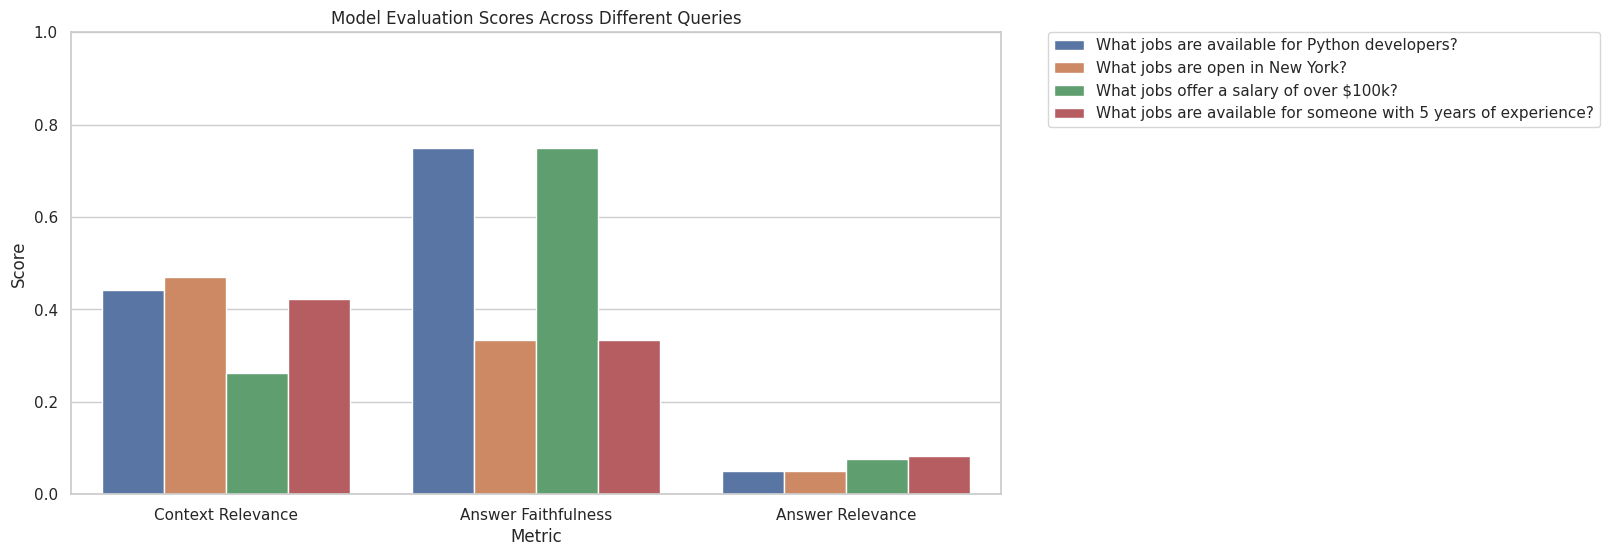

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Plotting the scores
sns.set(style="whitegrid")

# Create a barplot for each metric
plt.figure(figsize=(12, 6))
sns.barplot(x="Metric", y="Score", hue="Query Type", data=df_results)
plt.title("Model Evaluation Scores Across Different Queries")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# Test Model

In [54]:
from transformers import pipeline

# Set up the pipeline for text generation with the fine-tuned model
nlp_pipeline = pipeline("text-generation", model=base_model, tokenizer=tokenizer)

# Test the model with a sample query
test_query = "What jobs are available for Python developers?"
response = nlp_pipeline(test_query, max_length=150, num_return_sequences=1)

# Extract the generated text from the response
generated_text = response[0]['generated_text']

# Display the question and response in a nicely formatted way
print(f"Question: {test_query}\n")
print(f"Response:\n{generated_text}")


The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'Gemma2ForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'JambaForCausalLM', 'JetMoeForCausalLM', 'LlamaForCausalLM', 'MambaForCausalLM', 'Mamba2ForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MistralForCausalLM', 'MixtralForCausal

Question: What jobs are available for Python developers?

Response:
What jobs are available for Python developers? Python developers work in a variety of industries and roles, including web development, data science, machine learning, automation, and more. Here are some examples of Python developer jobs and their salary ranges:

1. Web Developer (Intermediate) - Salary: US$75,000–US$125,000
2. Web Developer (Entry Level) - Salary: US$55,000–US$85,000
3. Data Scientist (Intermediate) - Salary: US$90,000–US$150,000
4. Data


In [60]:
# Function to generate responses using the model's generate method
def generate_response(query, max_length=150):
    # Encode the input query
    input_ids = tokenizer.encode(query, return_tensors='pt').to(model.device)
    # Generate the response
    with torch.no_grad():
        output_ids = model.generate(
            input_ids=input_ids,
            max_length=max_length,
            num_return_sequences=1,
            do_sample=False,
            temperature=0.7,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id
        )
    # Decode the output ids to get the response text
    response_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return response_text


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.translate.bleu_score import sentence_bleu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [63]:
def evaluate_context_relevance(query, response):
    # Use TF-IDF vectorization and cosine similarity
    vectorizer = TfidfVectorizer().fit_transform([query, response])
    vectors = vectorizer.toarray()
    cosine_sim = cosine_similarity([vectors[0]], [vectors[1]])[0][0]
    return cosine_sim  # Returns a score between 0 and 1


def evaluate_answer_faithfulness(expected_keywords, response):
    # expected_keywords: list of keywords that should be in the response
    tokens = nltk.word_tokenize(response.lower())
    matched_keywords = set(tokens).intersection(set(expected_keywords))
    faithfulness_score = len(matched_keywords) / len(expected_keywords) if expected_keywords else 0
    return faithfulness_score  # Returns a score between 0 and 1


def evaluate_answer_relevance(query, response):
    # Use BLEU score as a proxy for answer relevance
    reference = nltk.word_tokenize(query.lower())
    candidate = nltk.word_tokenize(response.lower())
    bleu_score = sentence_bleu([reference], candidate)
    return bleu_score  # Returns a score between 0 and 1



In [64]:
# List of test queries for evaluation
test_queries = [
    "What jobs are available for Python developers?",
    "What jobs are open in New York?",
    "What jobs offer a salary of over $100k?",
    "What jobs are available for someone with 5 years of experience?"
]

# Expected keywords for answer faithfulness
expected_keywords_list = [
    ["python", "developer", "software", "engineer"],
    ["new york", "ny", "jobs"],
    ["salary", "over", "100k", "$100k"],
    ["5 years", "experience", "senior"]
]


In [65]:
# Store results for visualization
results = {"Query Type": [], "Metric": [], "Score": []}

for query, expected_keywords in zip(test_queries, expected_keywords_list):
    # Generate the response using the model
    response = generate_response(query)

    # Evaluate the response
    context_relevance_score = evaluate_context_relevance(query, response)
    answer_faithfulness_score = evaluate_answer_faithfulness(expected_keywords, response)
    answer_relevance_score = evaluate_answer_relevance(query, response)

    # Store the results
    results["Query Type"].extend([query] * 3)
    results["Metric"].extend(["Context Relevance", "Answer Faithfulness", "Answer Relevance"])
    results["Score"].extend([context_relevance_score, answer_faithfulness_score, answer_relevance_score])

    # Print the results for each query
    print(f"Query: {query}")
    print(f"Response: {response}\n")
    print(f"Context Relevance Score: {context_relevance_score:.2f}")
    print(f"Answer Faithfulness Score: {answer_faithfulness_score:.2f}")
    print(f"Answer Relevance Score: {answer_relevance_score:.2f}\n")
    print("-" * 80)


Query: What jobs are available for Python developers?
Response: What jobs are available for Python developers? Python developers work in a variety of industries and roles, including web development, data science, machine learning, automation, and more. Here are some examples of Python developer jobs and their salary ranges:

1. Web Developer (Intermediate) - Salary: US$75,000–US$125,000
2. Web Developer (Entry Level) - Salary: US$55,000–US$85,000
3. Data Scientist (Intermediate) - Salary: US$90,000–US$150,000
4. Data

Context Relevance Score: 0.25
Answer Faithfulness Score: 0.50
Answer Relevance Score: 0.07

--------------------------------------------------------------------------------
Query: What jobs are open in New York?
Response: What jobs are open in New York?

Jobs in New York City are available in a wide range of industries, including finance, technology, healthcare, education, and hospitality. Some popular job search websites that list jobs in New York City include LinkedIn, 

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

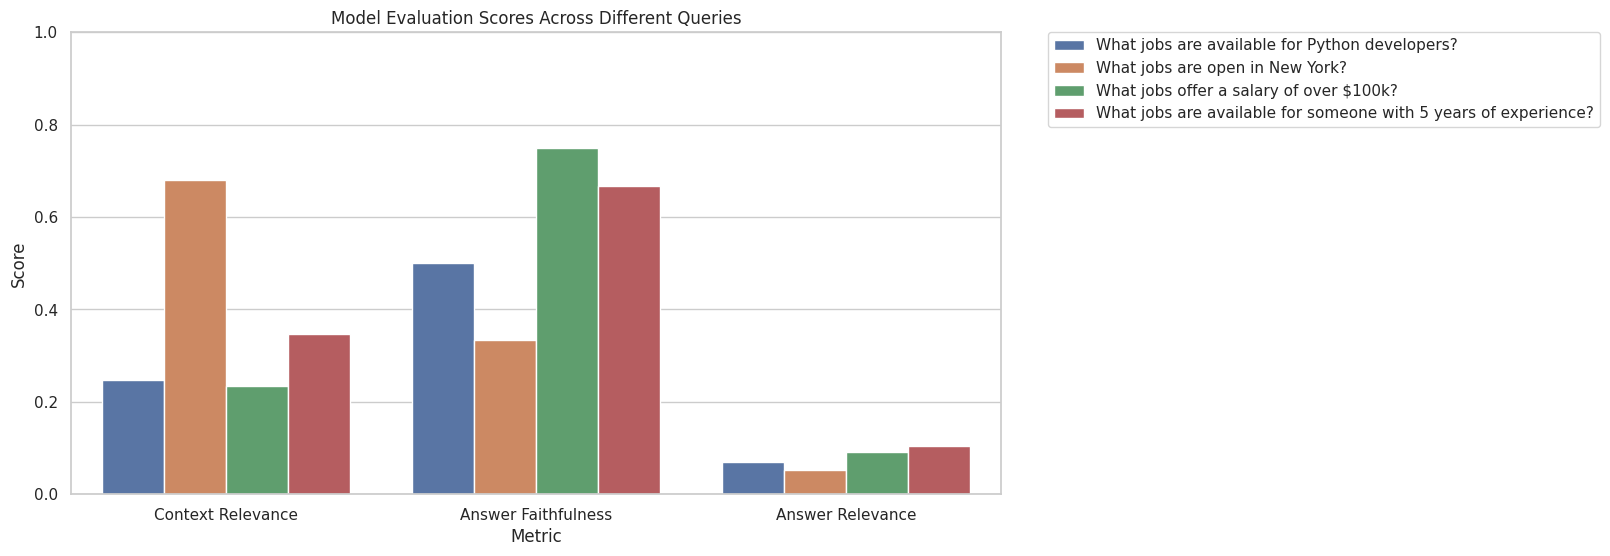

In [66]:
# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Plotting the scores
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create a barplot for each metric
plt.figure(figsize=(12, 6))
sns.barplot(x="Metric", y="Score", hue="Query Type", data=df_results)
plt.title("Model Evaluation Scores Across Different Queries")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [57]:
"""
from ares import AresEvaluator
from transformers import pipeline
import matplotlib.pyplot as plt

# Initialize the ARES evaluator
evaluator = AresEvaluator()

# Set up the text generation pipeline with your fine-tuned model
nlp_pipeline = pipeline("text-generation", model=base_model, tokenizer=tokenizer)

# List of test queries for evaluation
test_queries = [
    "What jobs are available for Python developers?",
    "What jobs are open in New York?",
    "What jobs offer a salary of over $100k?",
    "What jobs are available for someone with 5 years of experience?"
]

# Expected job descriptions for evaluation (these should be the ground-truth or ideal answers)
expected_descriptions = [
    "Software Developer, Backend Developer specializing in Python, Data Scientist.",
    "Software Engineer in New York, Data Analyst in New York.",
    "Project Manager, Senior Data Scientist with salary over $100k.",
    "Data Analyst with 5 years experience, Senior Software Engineer."
]

# Store results for visualization
results = {"Query Type": [], "Metric": [], "Score": []}

# Evaluate each query-response pair using ARES
for query, expected in zip(test_queries, expected_descriptions):
    # Generate the response using the model
    response = nlp_pipeline(query, max_length=150, num_return_sequences=1)[0]['generated_text']

    # Evaluate the response with ARES across different metrics
    context_relevance_score = evaluator.evaluate_context_relevance(query, response)
    answer_faithfulness_score = evaluator.evaluate_answer_faithfulness(expected, response)
    answer_relevance_score = evaluator.evaluate_answer_relevance(query, response)

    # Store the results for each metric
    results["Query Type"].extend([query] * 3)
    results["Metric"].extend(["Context Relevance", "Answer Faithfulness", "Answer Relevance"])
    results["Score"].extend([context_relevance_score, answer_faithfulness_score, answer_relevance_score])

# Display the results in a DataFrame for clarity
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)

"""


ImportError: cannot import name 'AresEvaluator' from 'ares' (/usr/local/lib/python3.10/dist-packages/ares/__init__.py)

## Phase 4

In [67]:
# Install necessary packages
!pip install rouge-score
nltk.download('wordnet')
nltk.download('omw-1.4')

from rouge_score import rouge_scorer
from nltk.translate.meteor_score import meteor_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=008bd2255e964e2a9795b84595b604f143d2017d4c7dc682094e50c5aa52ca81
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [68]:
# Expected responses for evaluation
expected_responses = [
    "Software Developer, Backend Developer specializing in Python, Data Scientist.",
    "Software Engineer positions in New York, Data Analyst roles in NY.",
    "Senior Data Scientist positions with salary over $100k.",
    "Senior Software Engineer positions for someone with 5 years of experience."
]


In [70]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import meteor_score

# Initialize lists to store the metric scores
bleu_scores = []
rouge_scores = []
meteor_scores = []

# Smoothing function for BLEU score calculation
smoothing_function = SmoothingFunction().method1

for query, expected_response in zip(test_queries, expected_responses):
    # Generate the response
    response = generate_response(query)

    # Tokenize the responses
    reference_tokens = [nltk.word_tokenize(expected_response.lower())]
    response_tokens = nltk.word_tokenize(response.lower())

    # Compute BLEU score with smoothing
    bleu = sentence_bleu(reference_tokens, response_tokens, smoothing_function=smoothing_function)
    bleu_scores.append(bleu)

    # Compute ROUGE scores
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    rouge = scorer.score(expected_response, response)
    rouge1 = rouge['rouge1'].fmeasure
    rougeL = rouge['rougeL'].fmeasure
    rouge_scores.append({'rouge1': rouge1, 'rougeL': rougeL})

    # Tokenize hypothesis and reference for METEOR score
    meteor = meteor_score([nltk.word_tokenize(expected_response.lower())], nltk.word_tokenize(response.lower()))
    meteor_scores.append(meteor)

    # Print the scores in a readable format
    print(f"Query: {query}")
    print(f"Response: {response}\n")
    print(f"BLEU Score: {bleu:.2f}")
    print(f"ROUGE-1 F1 Score: {rouge1:.2f}")
    print(f"ROUGE-L F1 Score: {rougeL:.2f}")
    print(f"METEOR Score: {meteor:.2f}\n")
    print("-" * 80)


Query: What jobs are available for Python developers?
Response: What jobs are available for Python developers? Python developers work in a variety of industries and roles, including web development, data science, machine learning, automation, and more. Here are some examples of Python developer jobs and their salary ranges:

1. Web Developer (Intermediate) - Salary: US$75,000–US$125,000
2. Web Developer (Entry Level) - Salary: US$55,000–US$85,000
3. Data Scientist (Intermediate) - Salary: US$90,000–US$150,000
4. Data

BLEU Score: 0.01
ROUGE-1 F1 Score: 0.14
ROUGE-L F1 Score: 0.14
METEOR Score: 0.23

--------------------------------------------------------------------------------
Query: What jobs are open in New York?
Response: What jobs are open in New York?

Jobs in New York City are available in a wide range of industries, including finance, technology, healthcare, education, and hospitality. Some popular job search websites that list jobs in New York City include LinkedIn, Indeed, G

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

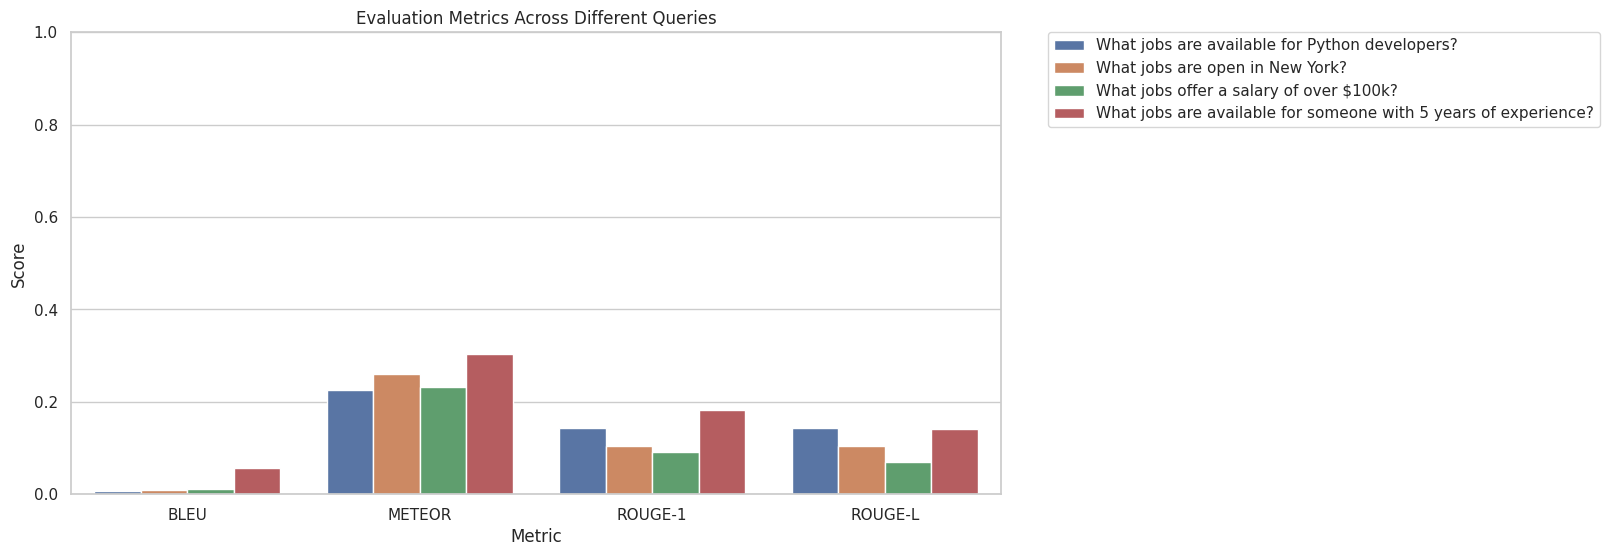

In [71]:
# Prepare data for visualization
metrics_df = pd.DataFrame({
    'Query': test_queries,
    'BLEU': bleu_scores,
    'METEOR': meteor_scores,
    'ROUGE-1': [score['rouge1'] for score in rouge_scores],
    'ROUGE-L': [score['rougeL'] for score in rouge_scores]
})

# Melt the DataFrame for plotting
metrics_melted = metrics_df.melt(id_vars='Query', var_name='Metric', value_name='Score')

# Plotting the scores
plt.figure(figsize=(12, 6))
sns.barplot(x="Metric", y="Score", hue="Query", data=metrics_melted)
plt.title("Evaluation Metrics Across Different Queries")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# Comparison: Base vs Lora

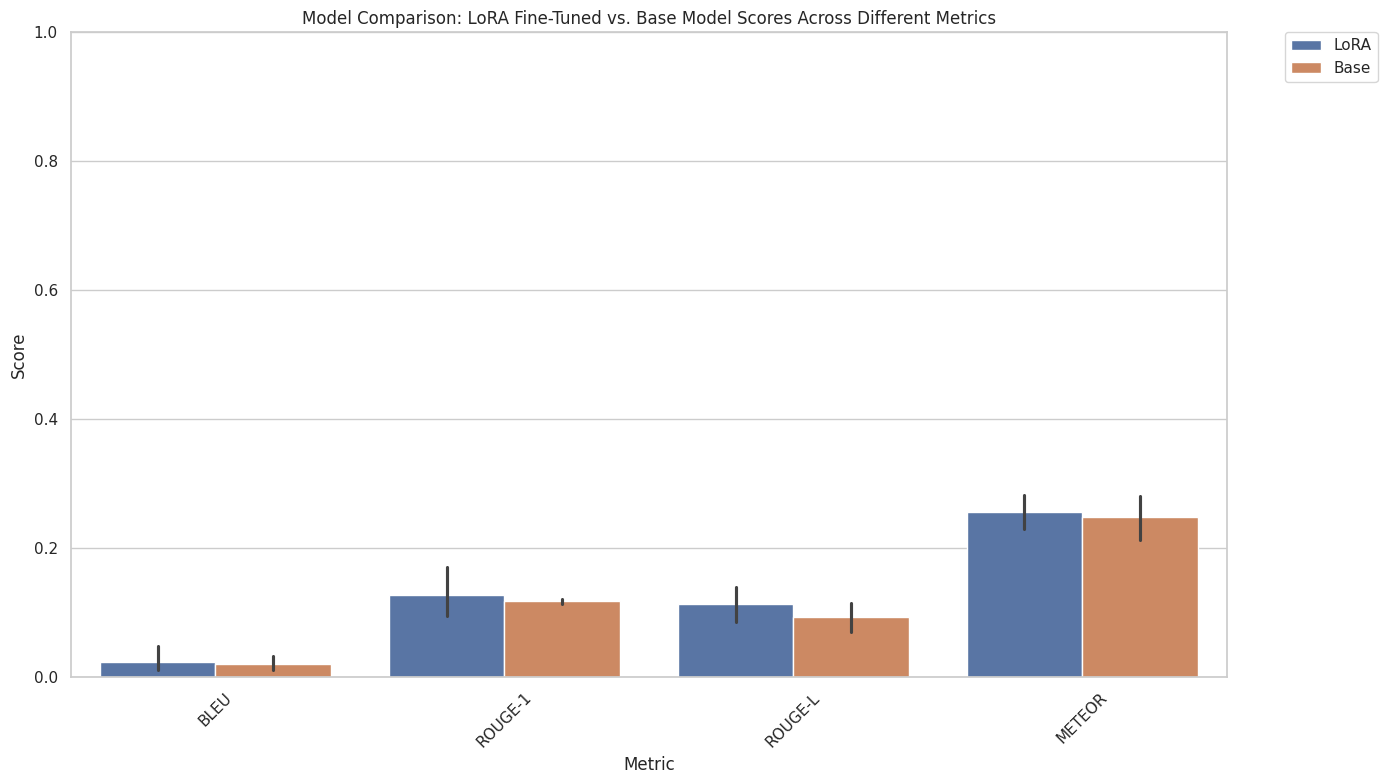

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correct LoRA data based on the output provided
lora_data = {
    'Query': [
        "What jobs are available for Python developers?",
        "What jobs are open in New York?",
        "What jobs offer a salary of over $100k?",
        "What jobs are available for someone with 5 years of experience?"
    ],
    'BLEU': [0.01, 0.01, 0.01, 0.06],
    'ROUGE-1': [0.14, 0.10, 0.09, 0.18],
    'ROUGE-L': [0.14, 0.10, 0.07, 0.14],
    'METEOR': [0.23, 0.26, 0.23, 0.30],
    'Model': ['LoRA'] * 4
}

# Updated Base model data based on the output provided
base_data = {
    'Query': [
        "What jobs are available for Python developers?",
        "What jobs are open in New York?",
        "What jobs offer a salary of over $100k?",
        "What jobs are available for someone with 5 years of experience?"
    ],
    'BLEU': [0.01, 0.02, 0.01, 0.04],
    'ROUGE-1': [0.12, 0.11, 0.12, 0.12],
    'ROUGE-L': [0.10, 0.09, 0.06, 0.12],
    'METEOR': [0.21, 0.22, 0.26, 0.30],
    'Model': ['Base'] * 4
}

# Combine the data into a DataFrame
lora_df = pd.DataFrame(lora_data)
base_df = pd.DataFrame(base_data)

# Concatenate both datasets into one for comparison
comparison_df = pd.concat([lora_df, base_df], ignore_index=True)

# Melt the DataFrame for plotting
comparison_melted = comparison_df.melt(id_vars=['Query', 'Model'], var_name='Metric', value_name='Score')

# Plotting the comparison bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=comparison_melted)
plt.title('Model Comparison: LoRA Fine-Tuned vs. Base Model Scores Across Different Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()


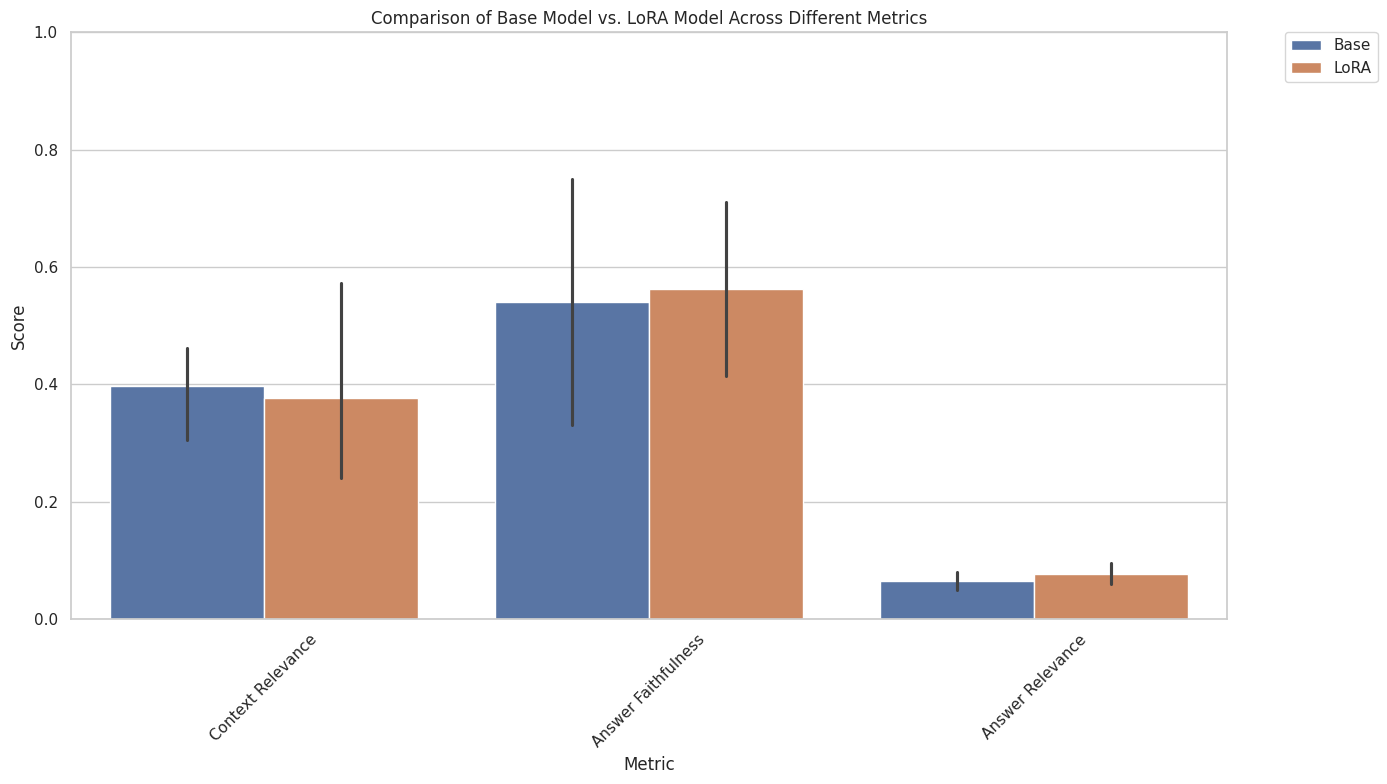

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the base and LoRA model performance
data = {
    'Query': [
        "What jobs are available for Python developers?",
        "What jobs are available for Python developers?",
        "What jobs are open in New York?",
        "What jobs are open in New York?",
        "What jobs offer a salary of over $100k?",
        "What jobs offer a salary of over $100k?",
        "What jobs are available for someone with 5 years of experience?",
        "What jobs are available for someone with 5 years of experience?"
    ],
    'Model': ['Base', 'LoRA', 'Base', 'LoRA', 'Base', 'LoRA', 'Base', 'LoRA'],
    'Context Relevance': [0.44, 0.25, 0.47, 0.68, 0.26, 0.23, 0.42, 0.35],
    'Answer Faithfulness': [0.75, 0.50, 0.33, 0.33, 0.75, 0.75, 0.33, 0.67],
    'Answer Relevance': [0.05, 0.07, 0.05, 0.05, 0.08, 0.09, 0.08, 0.10]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting with seaborn
df_melted = df.melt(id_vars=['Query', 'Model'], var_name='Metric', value_name='Score')

# Create a bar plot to compare the metrics of the base and LoRA models
plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=df_melted)
plt.title('Comparison of Base Model vs. LoRA Model Across Different Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()
